In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def plot_aspect_detection_performance(aspect_names, aspect_count, aspect_scores_glove, aspect_scores_fasttext, aspect_scores_elmo):
    plt.figure(figsize=(20,10))
    n = len(aspect_scores_glove)
    colors = np.random.rand(n)
    max_aspect_count = np.max(aspect_count)
    normalized_aspect_count = aspect_count/max_aspect_count
    print(normalized_aspect_count)
    area = (150 * normalized_aspect_count)**2
    x = np.arange(n)
    
    #glove
    plt.scatter(x, aspect_scores_glove, s=area, c='red', alpha=0.3)
    plt.plot(x,aspect_scores_glove, color='r')
    
    # fasttext
    plt.scatter(x, aspect_scores_fasttext, s=area, c='green', alpha=0.3)
    plt.plot(x,aspect_scores_fasttext, color='g')
    
    #elmo
    plt.scatter(x, aspect_scores_elmo, s=area, c='blue', alpha=0.3)
    plt.plot(x,aspect_scores_elmo, color='b')
    
    
    plt.title('Aspect detection performance', fontsize=25)
    plt.xlabel('Aspects', fontsize=25)
    plt.ylabel('Micro F1 scores', fontsize=25)
    plt.xticks(x, aspect_names, fontsize=15, rotation=90)
    plt.legend(['GloVe', 'fastText', 'ELMo'])
    plt.show()

[0.16136631 1.         0.02355713 0.10600707 0.30035336 0.0376914
 0.03297998 0.05535925 0.0942285  0.11542992 0.52885748 0.49705536]


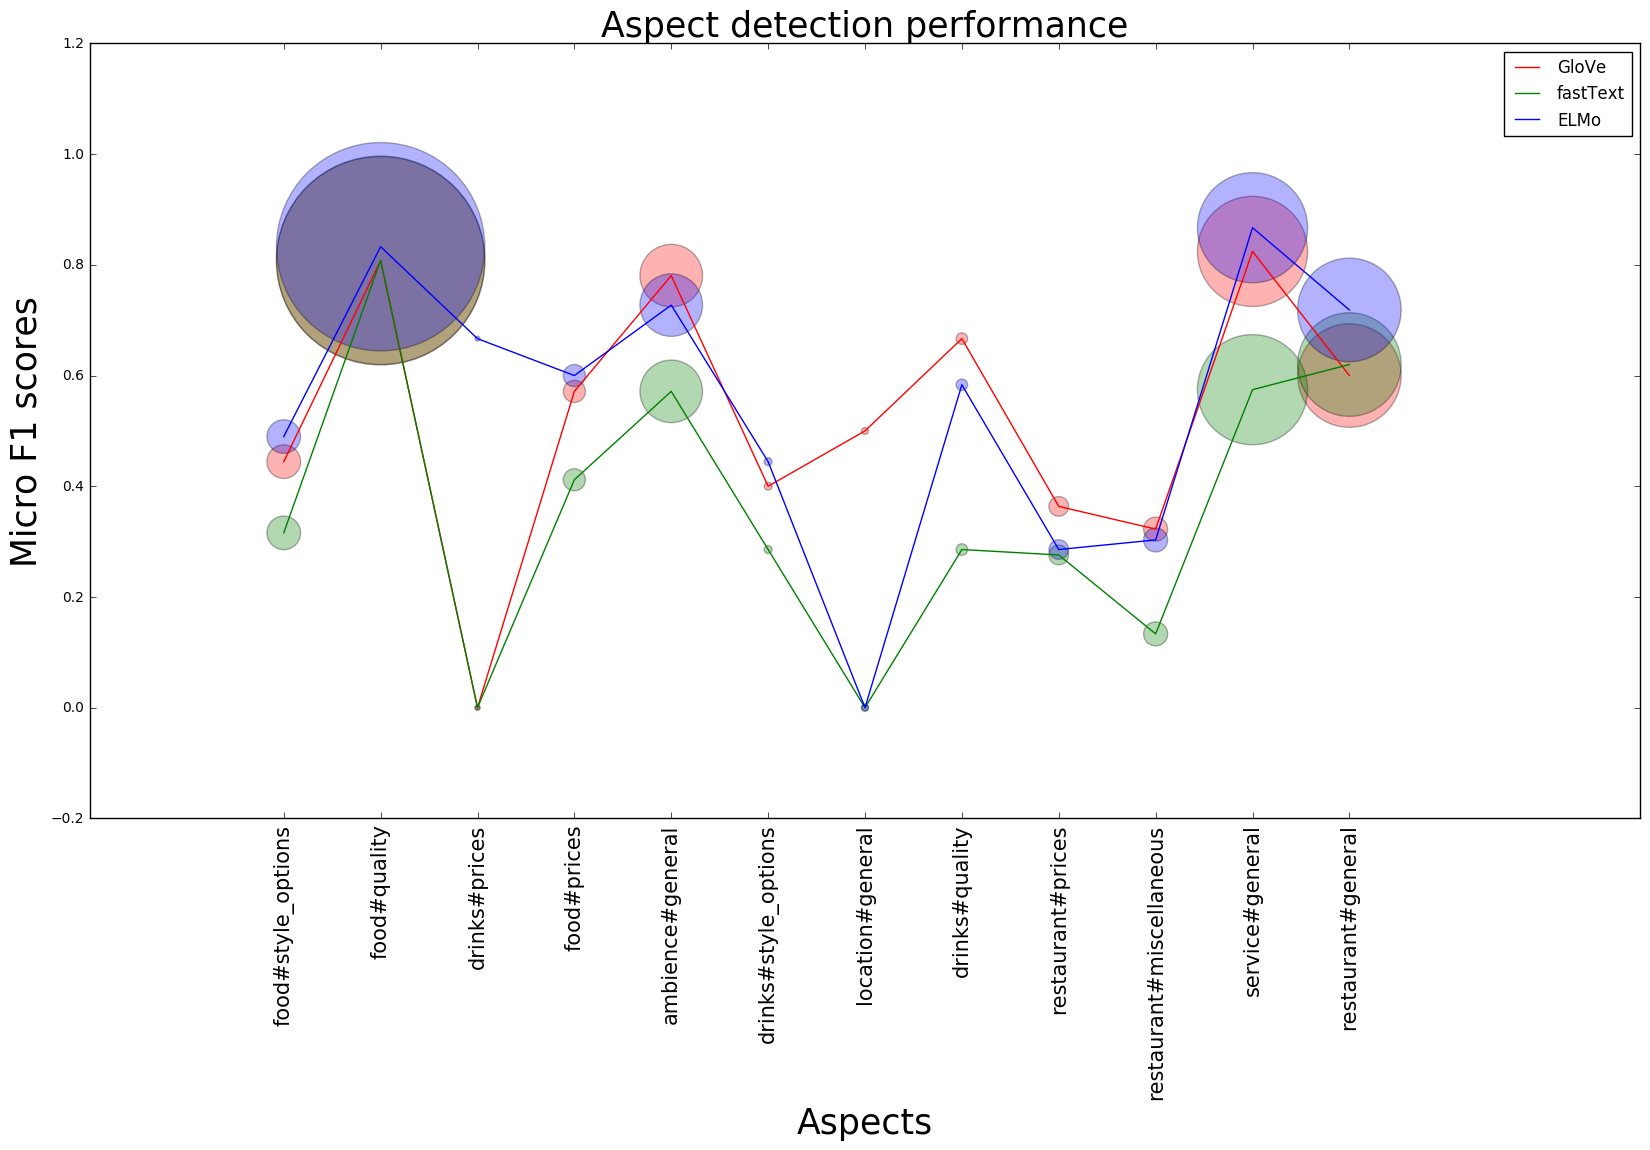

In [8]:
aspect_names = ['food#style_options', 'food#quality', 'drinks#prices', 'food#prices', 'ambience#general', 
                'drinks#style_options','location#general', 'drinks#quality', 'restaurant#prices', 
                'restaurant#miscellaneous','service#general','restaurant#general']
aspect_count = [137, 849, 20, 90, 255, 32, 28, 47, 80, 98, 449, 422]
aspect_scores_glove = [0.44439805, 0.8073571,  0.0, 0.5713745, 0.7804362, 0.39995003, 0.49995002, 0.6666118, 
 0.36359337, 0.32252985, 0.8241915, 0.5999521]
aspect_scores_fasttext = [0.31573853, 0.80816865, 0.0, 0.41171384, 0.57137734, 0.28566024, 0.0, 0.28566226, 
                          0.27581072, 0.13328476, 0.57441777, 0.6198327]
aspect_scores_elmo = [0.48974648, 0.8327139, 0.66659445, 0.59994626, 0.72722185, 0.44439998,
 0.0, 0.58327985, 0.2856753, 0.3029789, 0.86700106, 0.7185127]


plot_aspect_detection_performance(aspect_names, aspect_count, aspect_scores_glove, aspect_scores_fasttext, aspect_scores_elmo)

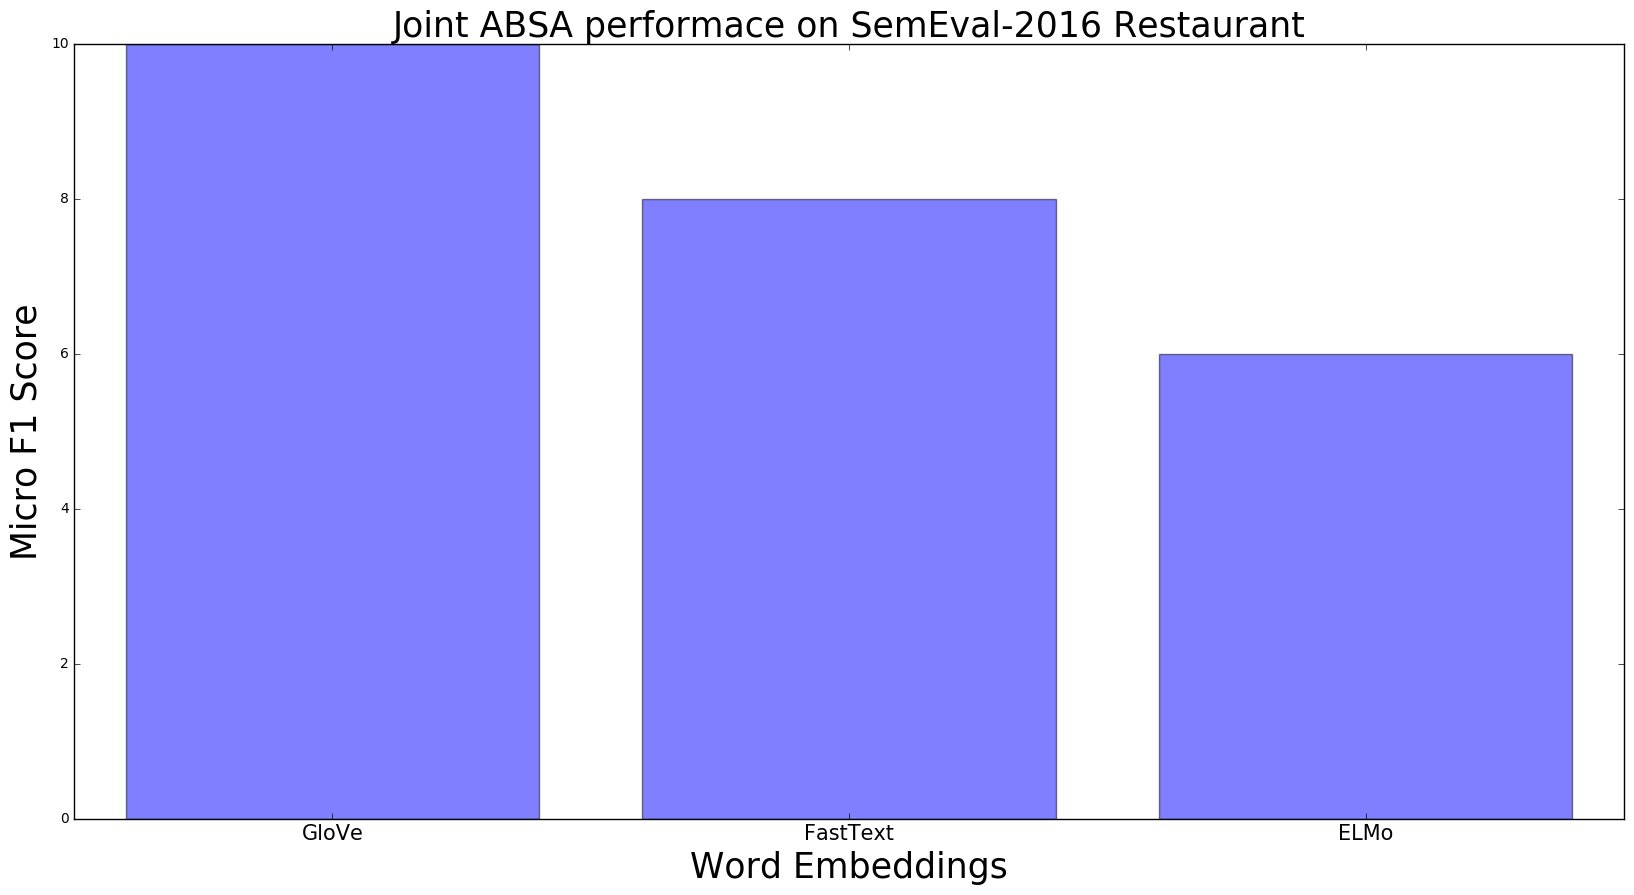

In [9]:
def f1_score_vs_embeddings():
    plt.figure(figsize=(20,10))
    score = []
    objects = ['GloVe', 'FastText', 'ELMo']
    y_pos = np.arange(len(objects))
    micro_f1_score = [10,8,6]
    plt.bar(y_pos, micro_f1_score, align='center', alpha=0.5)
    plt.xticks(y_pos, objects, fontsize=15)
    plt.ylabel('Micro F1 Score', fontsize=25)
    plt.xlabel('Word Embeddings', fontsize=25)
    plt.title('Joint ABSA performace on SemEval-2016 Restaurant', fontsize=25)
    plt.show()
    
f1_score_vs_embeddings()

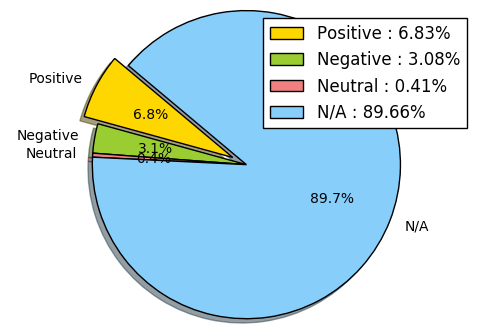

In [10]:
# Data to plot
labels = 'Positive','Negative', 'Neutral', 'N/A'
sizes = [1657, 749, 101, 21742]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.legend(['Positive : 6.83%','Negative : 3.08%', 'Neutral : 0.41%', 'N/A : 89.66%'])
# plt.title('Before data augmention')
plt.show()

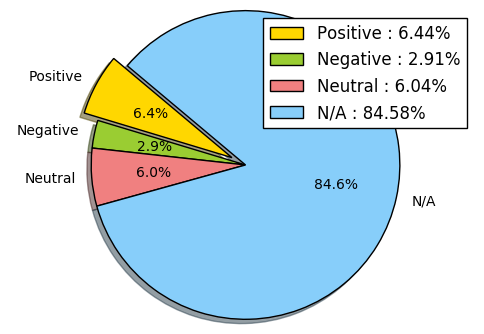

In [11]:
# Data to plot
labels = 'Positive','Negative', 'Neutral', 'N/A'
sizes = [1657, 749, 1555, 21742]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.legend(['Positive : 6.44%','Negative : 2.91%', 'Neutral : 6.04%', 'N/A : 84.58%'])
# plt.title('Before data augmention')
plt.show()

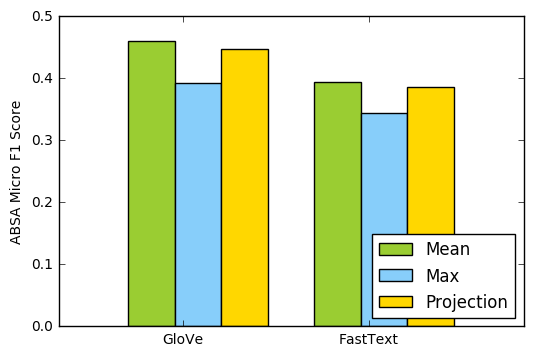

In [20]:
def aspect_fusion():
    
    N = 2
    ind = np.arange(N)  # the x locations for the groups
    width = 0.25       # the width of the bars
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    'gold', 'yellowgreen', 'lightcoral', 'lightskyblue'
    
    
    means = (0.460, 0.394)
    rects1 = ax.bar(ind, means, width, color='yellowgreen', align='center')

    maxes = (0.392, 0.344)
    rects2 = ax.bar(ind+width, maxes, width, color='lightskyblue', align='center')
    
    projections = (0.448,0.386)
    rects3 = ax.bar(ind+2*width, projections, width, color='gold', align='center')

    # add some
    ax.set_ylabel('ABSA Micro F1 Score')
    ax.set_xticks(ind + 2*width / 3)
    ax.set_xticklabels( ('GloVe', 'FastText') )
    ax.legend(('Mean', 'Max', 'Projection'), loc= 'lower right')
    plt.show()
    
aspect_fusion()

[1.         0.11344368 0.02906742 0.00266451 0.00347194 0.02858296
 0.01840937 0.04069439 0.01194994 0.00104966 0.02196205 0.05337101
 0.0039564  0.17674606 0.00347194 0.00387566 0.         0.00581348
 0.06927735 0.15486476]


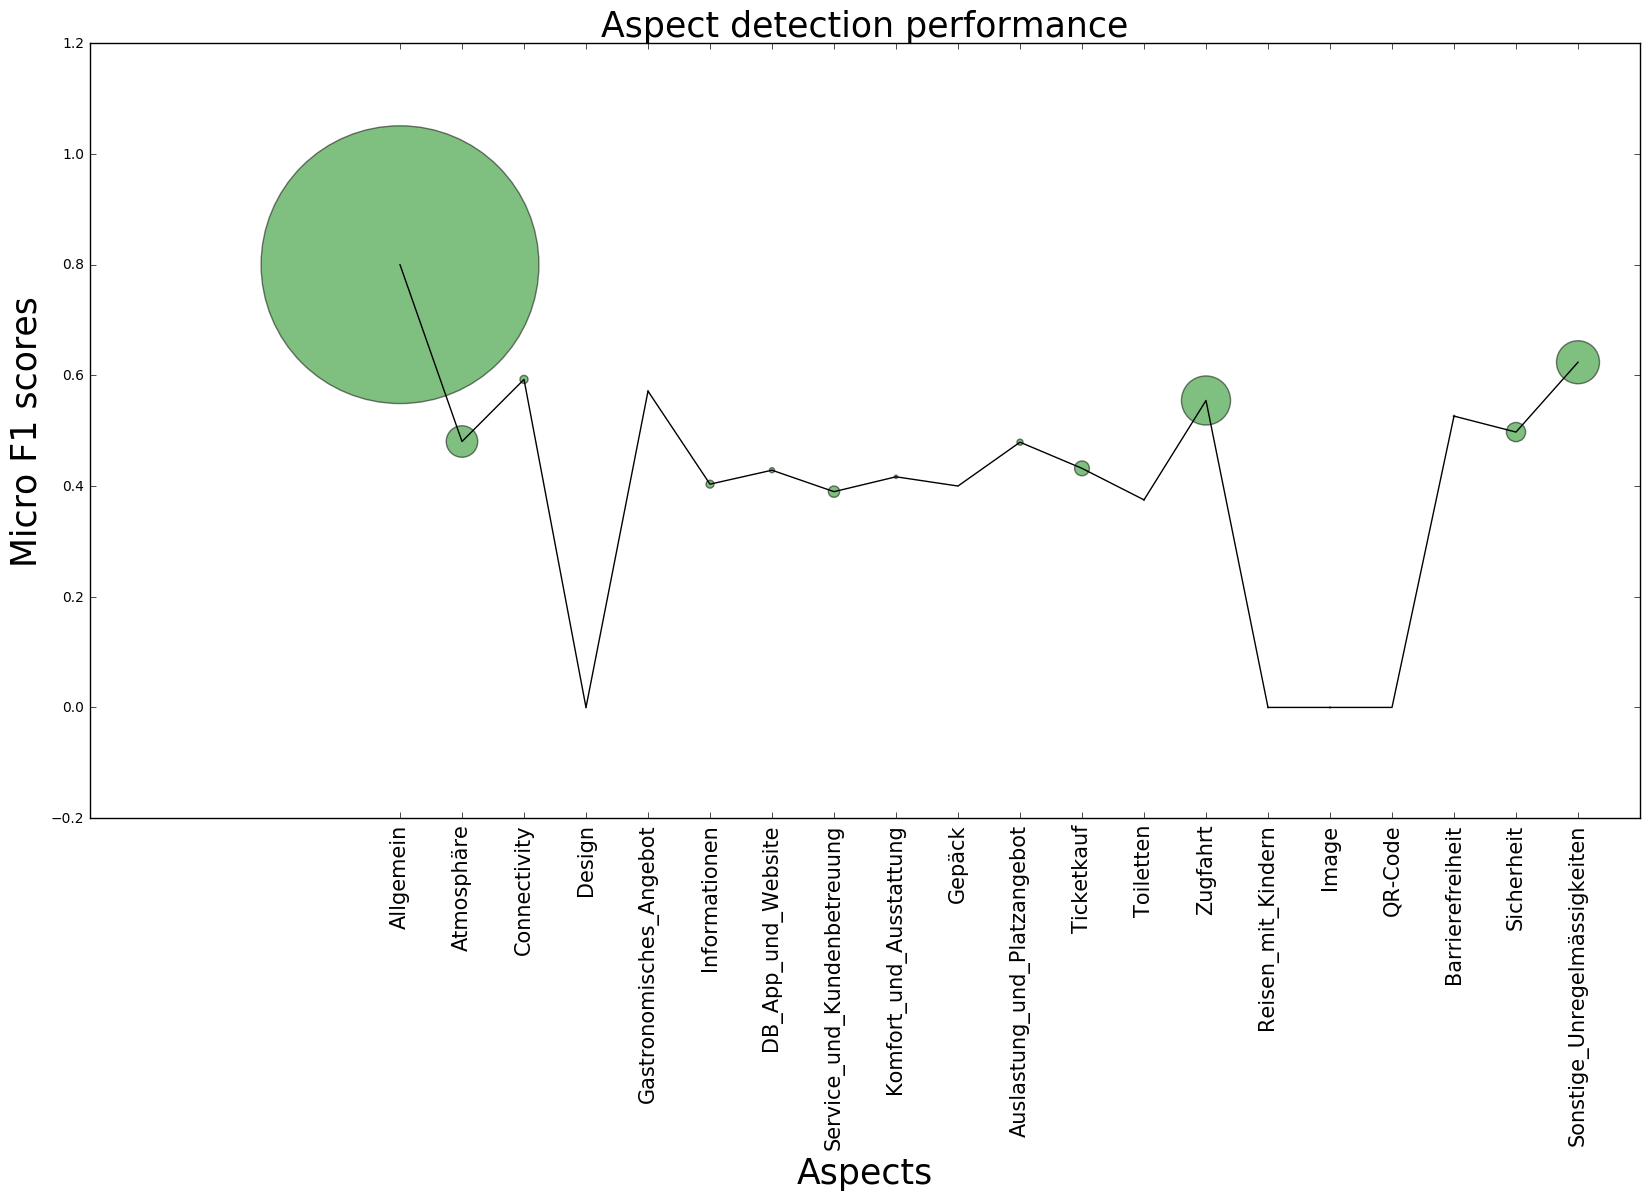

In [26]:
def plot_aspect_detection_performance(aspect_names, aspect_count, test1, test2):
    plt.figure(figsize=(20,10))
    n = len(test1)
    colors = np.random.rand(n)
    max_aspect_count = np.max(aspect_count)
    normalized_aspect_count = aspect_count/max_aspect_count
    print(normalized_aspect_count)
    area = (200 * normalized_aspect_count)**2
    x = np.arange(n)
    
    # test1
    plt.scatter(x, test1, s=area, c='green', alpha=0.5)
    plt.plot(x,test1, color='black')
    
#     # test2
#     plt.scatter(x, test2, s=area, c='green', alpha=0.3)
#     plt.plot(x,test2, color='g')
    
    
    plt.title('Aspect detection performance', fontsize=25)
    plt.xlabel('Aspects', fontsize=25)
    plt.ylabel('Micro F1 scores', fontsize=25)
    plt.xticks(x, aspect_names, fontsize=15, rotation=90)
#     plt.legend(['test 1', 'test 2'])
    plt.show()
    

aspect_names = ['Allgemein', 'Atmosphäre', 'Connectivity', 'Design', 'Gastronomisches_Angebot', 
                'Informationen','DB_App_und_Website', 'Service_und_Kundenbetreuung', 'Komfort_und_Ausstattung', 
                'Gepäck','Auslastung_und_Platzangebot','Ticketkauf', 'Toiletten', 'Zugfahrt', 'Reisen_mit_Kindern', 
                'Image', 'QR-Code', 'Barrierefreiheit', 'Sicherheit', 'Sonstige_Unregelmässigkeiten']
aspect_count = [12385, 1405, 360, 33, 43, 354, 228, 504, 148, 13, 272, 661, 49, 2189, 43, 48, 0, 72, 858, 1918]
test1 = [0.7998222,0.4803701,0.5925418,0.0,0.5713633,0.4033107,0.42851987,0.38978007,0.41661492,0.399936,0.47911936,0.43187505,0.3749461,0.554479,0.0,0.0,0.0,0.5262604,0.4974125, 0.6235675]
test2 = [0.31573853, 0.80816865, 0.0, 0.41171384, 0.57137734, 0.28566024, 0.0, 0.28566226, 
                          0.27581072, 0.13328476, 0.57441777, 0.6198327]


plot_aspect_detection_performance(aspect_names, aspect_count, test1, test2)

[1.         0.19419823 0.28847703 0.72199839 0.42062853 0.26591459
 0.09750201 0.00886382 0.04109589 0.20064464 0.01611604 0.05962933
 0.09508461 0.00483481 0.00886382 0.05882353 0.01289283 0.01531023]


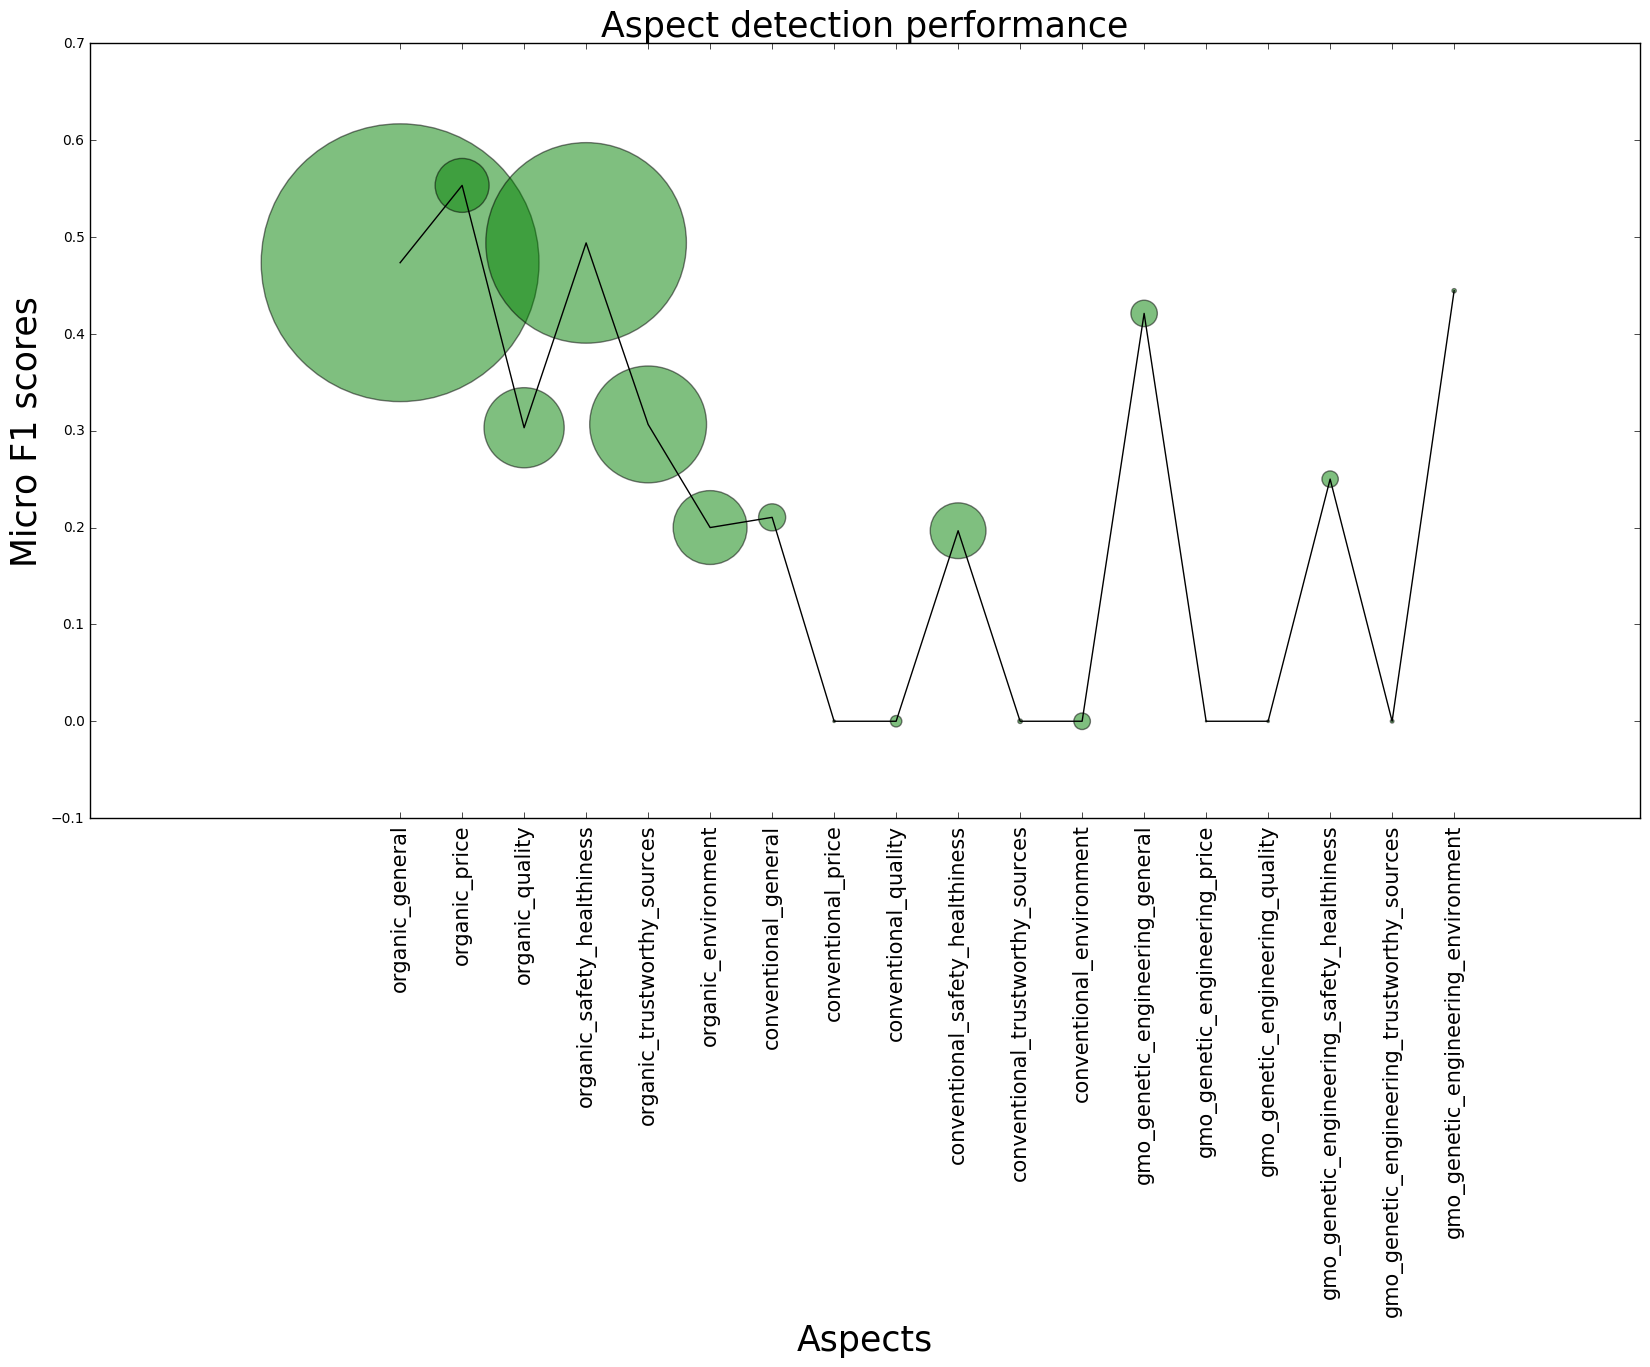

In [27]:
aspect_names = ['organic_general', 'organic_price', 'organic_quality', 'organic_safety_healthiness', 
                'organic_trustworthy_sources', 
                'organic_environment','conventional_general', 'conventional_price', 'conventional_quality', 
                'conventional_safety_healthiness','conventional_trustworthy_sources','conventional_environment', 
                'gmo_genetic_engineering_general', 'gmo_genetic_engineering_price', 'gmo_genetic_engineering_quality', 
                'gmo_genetic_engineering_safety_healthiness', 'gmo_genetic_engineering_trustworthy_sources', 
                'gmo_genetic_engineering_environment']
aspect_count = [1241, 241, 358, 896, 522, 330, 121, 11, 51, 249, 20, 74, 118, 6, 11, 73, 16, 19]
test1 = [0.47332388, 0.5531397,  0.30297983, 0.49377704, 0.30640158, 0.19995019,
 0.21047536, 0.0,         0.0,         0.1966737,  0.0,         0.0,
 0.42099944, 0.0,         0.0,         0.2499719,  0.0,         0.44439998]
test2 = [0.31573853, 0.80816865, 0.0, 0.41171384, 0.57137734, 0.28566024, 0.0, 0.28566226, 
                          0.27581072, 0.13328476, 0.57441777, 0.6198327]


plot_aspect_detection_performance(aspect_names, aspect_count, test1, test2)